In [1]:
import numpy
import pandas
import joblib
import seaborn
import matplotlib.pyplot

%matplotlib inline

# Instructions

- Read **the train data** from the CSV file and properly set the index
- Load the trained model

In [2]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,feature_1,label
id,,
253,1.4920,1.0676
667,-0.9317,0.8359
85,-1.4077,-1.6642
969,2.2750,0.7641
75,-2.7649,-0.0689
...,...,...
835,-0.1237,-0.8241
192,-1.8828,-1.0807
629,-2.1139,-2.9819


In [3]:
model = joblib.load('model/model.joblib')
model

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear_regression', LinearRegression())])

# Instructions

- Create a new `pandas.DataFrame` with columns `feature_1`, `prediction`
  - The column `feature_1` represents the input having values around the training samples
    - Hint: use the minimum and maximum of `feature_1`
    - Hint: use `numpy.linspace` to make 50 evenly spaced points
  - The column `prediction` represents the corresponding predictions
- Note that this (approximately) serves as all possible data points in the space



In [4]:
range_feature_1 = numpy.linspace(data_train['feature_1'].min(), data_train['feature_1'].max(), 50)
data_meshgrid = pandas.DataFrame({'feature_1' : range_feature_1})
data_meshgrid

,feature_1
0,-2.996700
1,-2.874341
2,-2.751982
3,-2.629622
4,-2.507263
5,-2.384904
6,-2.262545
7,-2.140186
8,-2.017827
9,-1.895467


In [5]:
data_meshgrid['prediction']  = model.predict(data_meshgrid[['feature_1']])
data_meshgrid

,feature_1,prediction
0,-2.996700,-2.678762
1,-2.874341,-2.384901
2,-2.751982,-2.114046
3,-2.629622,-1.865209
4,-2.507263,-1.637404
5,-2.384904,-1.429645
6,-2.262545,-1.240945
7,-2.140186,-1.070318
8,-2.017827,-0.916778
9,-1.895467,-0.779338


# Instructions
- Use `seaborn.lineplot` to plot the prediction function and overlay training samples on it
- Explain what a prediction function and residuals are
- Describe what the model prediction function looks like 
- Export the prediction function to `./results/prediction_function.png`

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

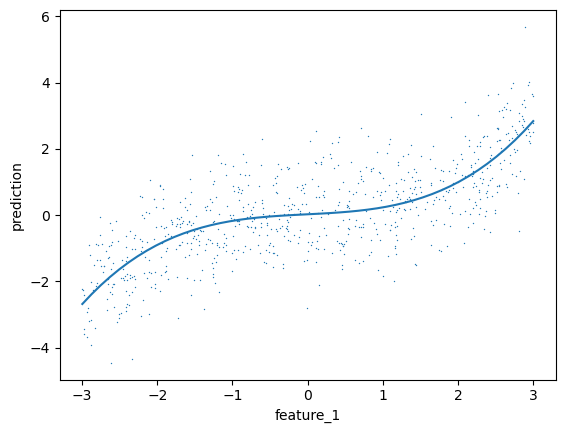

In [6]:
axis = seaborn.lineplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'prediction',
)

axis = seaborn.scatterplot(
    x = data_train['feature_1'],
    y = data_train['label'],
    s = 1,
)

In [7]:
figure = axis.get_figure()
figure.savefig("./results/prediction_function.png")